In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog

In [2]:
good_dir = r'C:\Users\USER\Pictures\Nadun\Project\SideView\Good'
broken_dir = r'C:\Users\USER\Pictures\Nadun\Project\SideView\Bad'

images = []
labels = []


In [3]:
def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (150, 150))
            images.append(img)
            labels.append(label)

load_images_from_folder(good_dir, 'good')
load_images_from_folder(broken_dir, 'broken')

In [4]:
images = np.array(images)
labels = np.array(labels)

In [5]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [6]:
hog_features = []
for image in images:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features, _ = hog(gray_image, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True)
    hog_features.append(features)

hog_features = np.array(hog_features)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)


In [8]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

Model accuracy: 100.00%


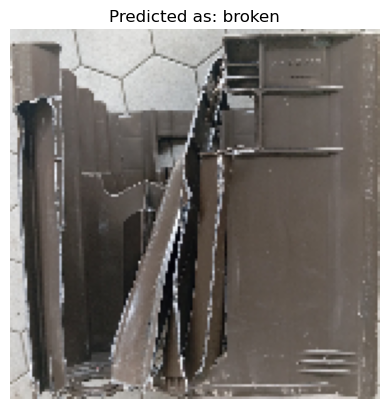

The image is predicted as: broken


In [14]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

def predict_new_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features, _ = hog(gray_image, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True)
    features = features.reshape(1, -1)
    prediction = svm_model.predict(features)
    label = le.inverse_transform(prediction)[0]
    
    # Display the image with the predicted label
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted as: {label}")
    plt.axis('off')
    plt.show()
    
    return label

# Example prediction
new_image_path = r'C:\Users\USER\Pictures\Nadun\Project\SideView\badtest2.jpg'
print(f"The image is predicted as: {predict_new_image(new_image_path)}")

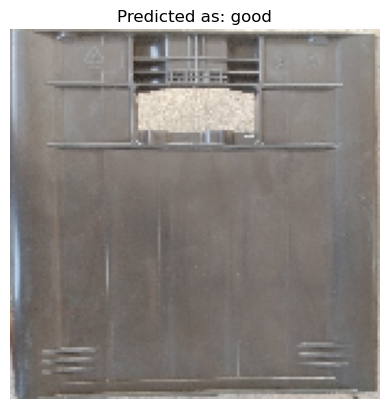

The image is predicted as: good


In [17]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

def predict_new_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features, _ = hog(gray_image, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True)
    features = features.reshape(1, -1)
    prediction = svm_model.predict(features)
    label = le.inverse_transform(prediction)[0]
    
    # Display the image with the predicted label
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted as: {label}")
    plt.axis('off')
    plt.show()
    
    return label
    

# Example prediction
new_image_path = r'C:\Users\USER\Pictures\Nadun\Project\SideView\goodtest2.jpg'
print(f"The image is predicted as: {predict_new_image(new_image_path)}")